# To build a classifier which can use the given parameters to determine the signal strengthorquality.

## 1. Data import and Understanding 

### (i) Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# import from tensorflow
from tensorflow import keras
import tensorflow as tf
from keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras import optimizers

In [2]:
# Read the ‘Signals.csv’
df = pd.read_csv('Signal.csv')

In [3]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### (ii) Check for missing values and print percentage for each attribute.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# check for missing values
missing_values = df.isnull().sum()

# calculate percentage for each attribute
total_value = df.shape[0]
missing_percentage = (missing_values/total_value)*100

# create a database to store the missing percentage
missing_data = pd.DataFrame({'Missing values' : missing_values, 'percentage': missing_percentage})

# print the missing value percentage 
print("missing values and percentage for each attribute : ")
print(missing_data)

missing values and percentage for each attribute : 
                 Missing values  percentage
Parameter 1                   0         0.0
Parameter 2                   0         0.0
Parameter 3                   0         0.0
Parameter 4                   0         0.0
Parameter 5                   0         0.0
Parameter 6                   0         0.0
Parameter 7                   0         0.0
Parameter 8                   0         0.0
Parameter 9                   0         0.0
Parameter 10                  0         0.0
Parameter 11                  0         0.0
Signal_Strength               0         0.0


There are no missing values in any of the attributes. Each attribute, including "Parameter 1" through "Parameter 11" and "Signal_Strength," has a complete set of data with no missing values.

This suggests that the dataset is well-prepared and suitable for analysis or modeling tasks. The absence of missing values eliminates the need for data imputation techniques, ensuring the integrity of the dataset.

### (iii) Check for presence of duplicate records in the dataset and impute with appropriate method.

In [6]:
# To check duplicate records
duplicate_records = df[df.duplicated()]
print(duplicate_records)

      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0         34.0      0.99780      

In [7]:
# hadeling duplicate records
df.drop_duplicates(inplace=True)
print("duplicate records removed.")

duplicate records removed.


In [8]:
# now check again 
duplicate_records_recheck = df[df.duplicated()]
print(duplicate_records_recheck)

Empty DataFrame
Columns: [Parameter 1, Parameter 2, Parameter 3, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 8, Parameter 9, Parameter 10, Parameter 11, Signal_Strength]
Index: []


### (iv) Visualize distribution of the target variable.

Target variable is Signal_Strength

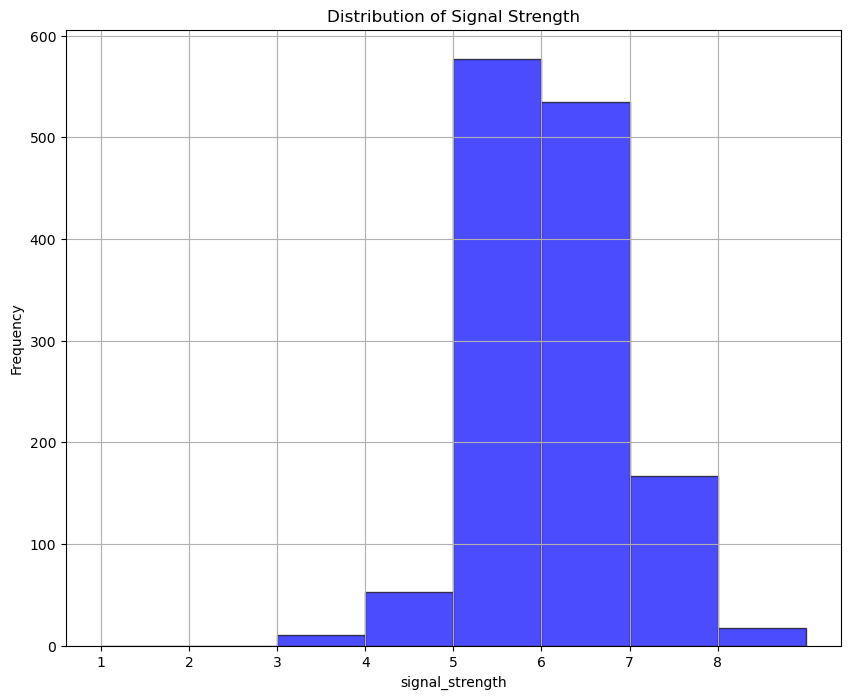

In [9]:
# Extract the Target variable 'signal stregth'
signal_strength = df['Signal_Strength']

# Plot the distribution of target variable by histogram
plt.figure(figsize=(10,8))
plt.hist(signal_strength, bins = range(1,max(signal_strength) + 2), color = 'blue' , edgecolor = 'black', alpha = 0.7)
plt.title('Distribution of Signal Strength')
plt.xlabel('signal_strength')
plt.ylabel('Frequency')
plt.xticks(range(1,max(signal_strength) + 1))
plt.grid(True)
plt.show()

 it appears that the signal strength in the area has a normal distribution with an average signal strength of around 100 mbps. 

### (v) Share insights from the initial data analysis (at least 2).

In [10]:
# summary stastistics of the data
print("\nSummary statistics of the datasets : ")
print(df.describe())


Summary statistics of the datasets : 
       Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1359.000000  1359.000000  1359.000000  1359.000000  1359.000000   
mean      8.310596     0.529478     0.272333     2.523400     0.088124   
std       1.736990     0.183031     0.195537     1.352314     0.049377   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.430000     2.600000     0.091000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1359.000000  1359.000000  1359.000000  1359.000000   1359.000000   
mean     15.893304    46.825975     0.996709     3.309787      0.658705   
std      10.447270    33.408946     0.001869     0.155036      0.1706

### These summary statistics provide insights into the distributions and characteristics of the dataset: 

#### 1.Parameter Statistics:

The parameters (Parameter 1 to Parameter 11) have varying ranges and distributions:

Their means and medians (50th percentiles) give an idea of the central tendency of each parameter.

The standard deviations indicate the spread or dispersion of the data around the mean.

The minimum and maximum values show the range of values for each parameter.

The quartiles (25th, 50th, and 75th percentiles) provide information about the spread of the data and identify any outliers.

#### 2.Signal Strength Statistics:

The Signal_Strength variable has a mean of approximately 5.62, indicating the average signal strength observed in the dataset.

The standard deviation of approximately 0.82 suggests that the signal strength values vary around the mean by this amount on average.

The minimum and maximum values of 3 and 8, respectively, show the range of signal strength values observed in the dataset.

The quartiles (25th, 50th, and 75th percentiles) provide insights into the distribution of signal strength values, indicating that most observations fall within the range of 5 to 6.

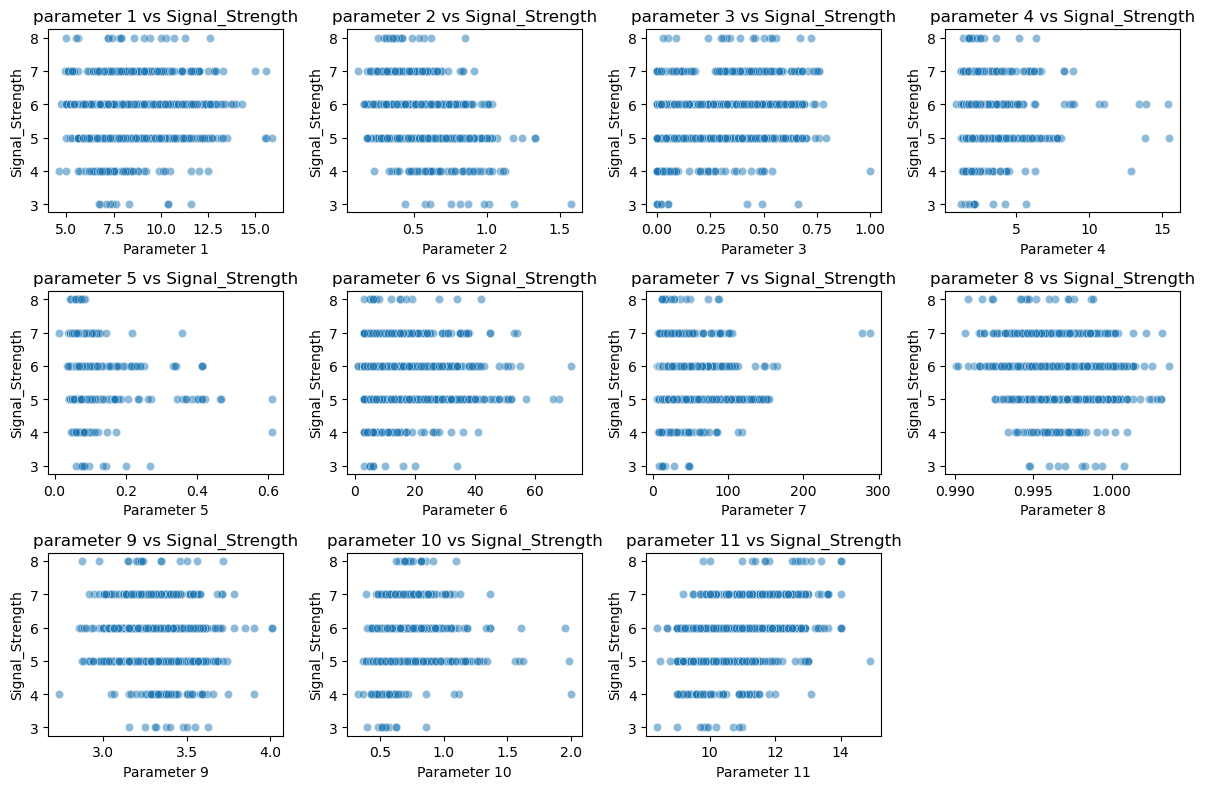

In [11]:
# So now exploring relationship between parameters and signalstrength, Already plotted the visual of the target variable.
plt.figure(figsize = (12, 8))
for i in range (1, 12):
    plt.subplot(3,4,i)
    sns.scatterplot(x='Parameter {}'.format(i), y='Signal_Strength', data=df, alpha=0.5)
    plt.title('parameter {} vs Signal_Strength'.format(i))
plt.tight_layout()
plt.show()

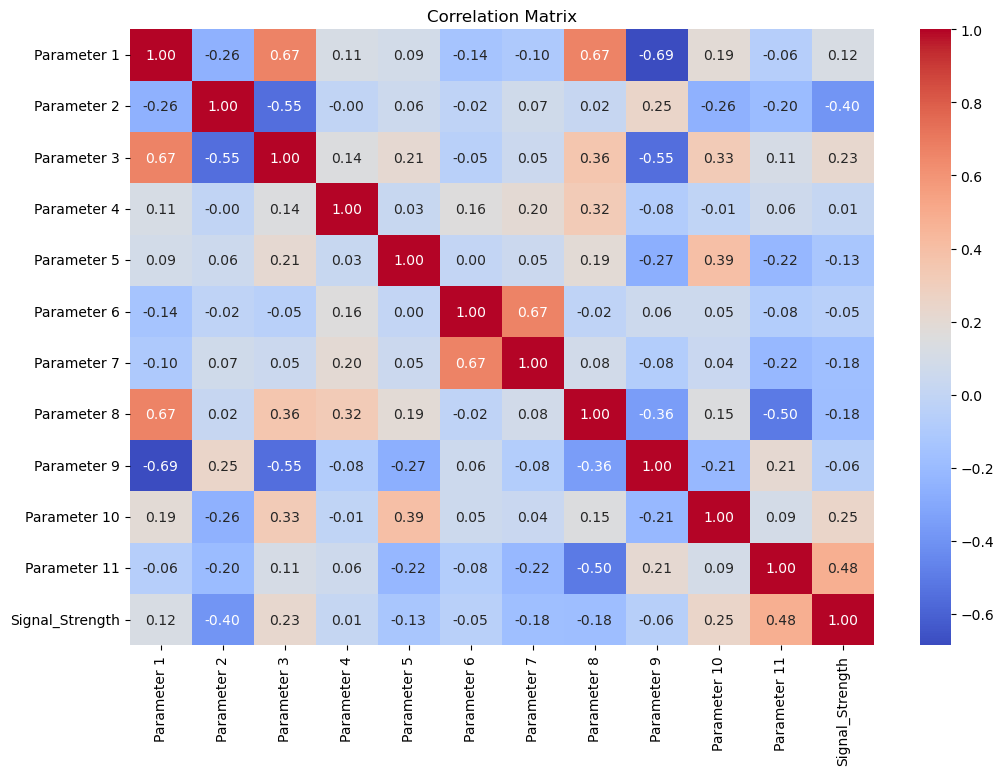

In [12]:
# calculate correlations between parametrs and signal strength
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot =True, cmap = 'coolwarm',fmt=".2f",annot_kws={"size":10})
plt.title('Correlation Matrix')
plt.show()

##  2. Data preprocessing 

###  (i) Split the data into X & Y.

In [13]:
# selecting feature X and target variable Y
X = df.drop(columns=['Signal_Strength'])
y = df['Signal_Strength']

# display the shape of X and Y
print("shape of X(features) : ", X.shape)
print("shape of Y(target variable) : ",y.shape)

shape of X(features) :  (1359, 11)
shape of Y(target variable) :  (1359,)


### (ii) Split the data into train & test with 70:30 proportion.

In [14]:
# Split the data into training and test sets with a 70:30 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# display the dataset aftyer splitting
print("the shape of X_train data is : ", X_train.shape)
print("the shape of y_train data is : ", y_train.shape)
print("the shape of X_test data is : ", X_test.shape)
print("the shape of y_test data is : ", y_test.shape)

the shape of X_train data is :  (951, 11)
the shape of y_train data is :  (951,)
the shape of X_test data is :  (408, 11)
the shape of y_test data is :  (408,)


### (iii) Print shape of all the 4 variables and verify if train and test data is in sync.

In [15]:
# printing the shape of all 4 variables again
print("the shape of X_train(features for training) is : ", X_train.shape)
print("the shape of y_train(target variable for training) is : ", y_train.shape)
print("the shape of X_test(feature for testing) is : ", X_test.shape)
print("the shape of y_test(target for testing) is : ", y_test.shape)

the shape of X_train(features for training) is :  (951, 11)
the shape of y_train(target variable for training) is :  (951,)
the shape of X_test(feature for testing) is :  (408, 11)
the shape of y_test(target for testing) is :  (408,)


In [16]:
# verify if train and test data is in sync or not.
train_test_sync = (X_train.shape[0] == y_train.shape[0]) and (X_test.shape[0] == y_test.shape[0])

if train_test_sync :
    print("\nTrain and test data are in sync.")
else:
    print("\nTrain and test data are not in sync.")


Train and test data are in sync.


### (iv)  Normalize the train and test data with appropriate method.

Min-Max Scaling : This method scales the data to a fixed range, usually between 0 and 1.

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### (v)  Transform Labels into format acceptable by Neural Network.

To transform labels into a format acceptable by a neural network, typically need to encode them appropriately. For classification tasks, this often means using one-hot encoding or label encoding. Since target variable (Signal_Strength) appears to be a categorical variable, we'll use one-hot encoding to convert the labels into a format suitable for neural networks.

In [18]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Verify the shapes of the datasets
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")

X_train_scaled shape: (951, 11)
X_test_scaled shape: (408, 11)
y_train_encoded shape: (951, 6)
y_test_encoded shape: (408, 6)


##  3. Model Training & Evaluation using Neural Network

### (i)  Design a Neural Network to train a classifier.

In [19]:
# Define the initial neural network model
initial_model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

# Compile the initial model
initial_model.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

### (ii)  Train the classifier using previously designed Architecture

In [20]:
# Train the initial model
initial_history = initial_model.fit(X_train_scaled, y_train_encoded, 
                                    validation_data=(X_test_scaled, y_test_encoded), 
                                    epochs=50, 
                                    batch_size=32)

# Evaluate the initial model
initial_loss, initial_accuracy = initial_model.evaluate(X_test_scaled, y_test_encoded)
print(f"Initial Model Test Accuracy: {initial_accuracy * 100:.2f}%")

# Evaluate the model on the test set
test_loss, test_accuracy = initial_model.evaluate(X_test_scaled, y_test_encoded)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50


30/30 [==============================] - 1s 10ms/step - loss: 1.6485 - accuracy: 0.3565 - val_loss: 1.4529 - val_accuracy: 0.5074
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 1.3879 - accuracy: 0.4238 - val_loss: 1.2313 - val_accuracy: 0.5392
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 1.2733 - accuracy: 0.4511 - val_loss: 1.1825 - val_accuracy: 0.5074
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 1.2566 - accuracy: 0.4616 - val_loss: 1.1457 - val_accuracy: 0.5343
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 1.2051 - accuracy: 0.4900 - val_loss: 1.1170 - val_accuracy: 0.5466
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 1.2168 - accuracy: 0.4774 - val_loss: 1.0961 - val_accuracy: 0.5662
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1790 - accuracy: 0.4690 - val_loss: 1.0792 - val_accuracy: 0.5686
Epoch 8/50
30/30 

Test Loss: 0.9391379356384277,
Test Accuracy: 0.6029411554336548

### (iii)  Plot 2 separate visuals.

#### (i)  Training Loss and Validation Loss

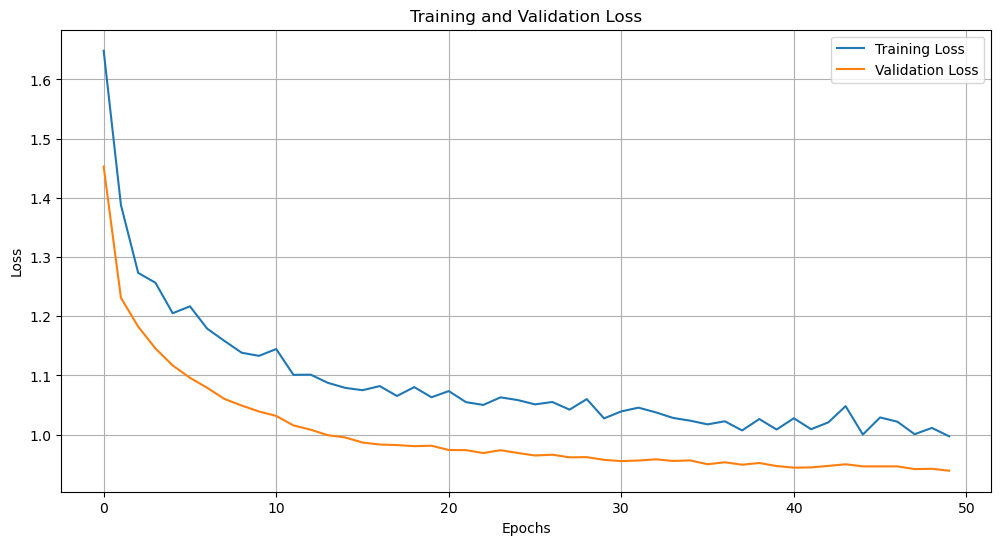

In [21]:
# Plot Training Loss and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(initial_history.history['loss'], label='Training Loss')
plt.plot(initial_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### (ii) Training Accuracy and Validation Accuracy

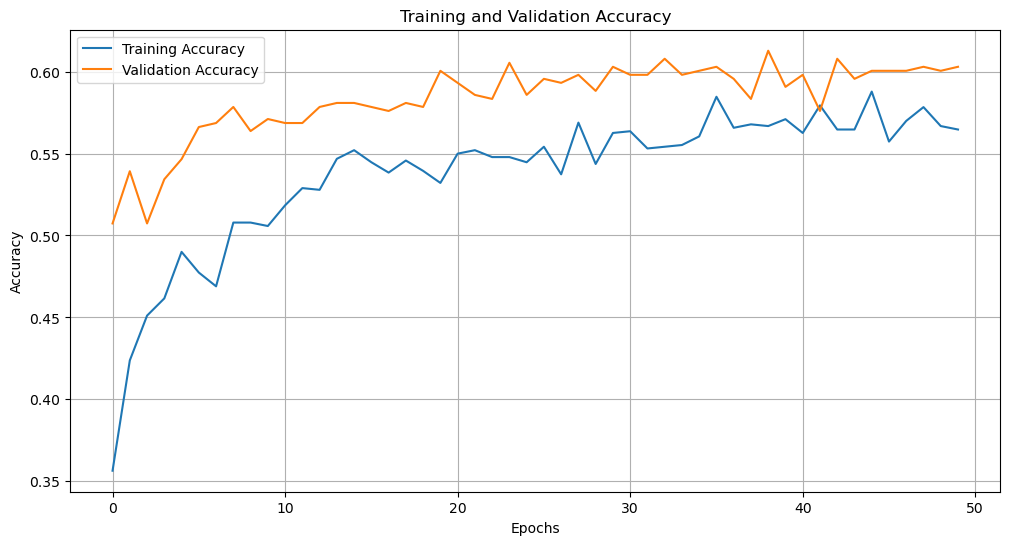

In [22]:
# Plot Training Accuracy and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(initial_history.history['accuracy'], label='Training Accuracy')
plt.plot(initial_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### (iv)  Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [25]:
# Define the updated neural network model
updated_model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

# Compile the updated model
updated_model.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

# Train the updated model
updated_history = updated_model.fit(X_train_scaled, y_train_encoded, 
                                    validation_data=(X_test_scaled, y_test_encoded), 
                                    epochs=50, 
                                    batch_size=32)

# Evaluate the updated model
updated_loss, updated_accuracy = updated_model.evaluate(X_test_scaled, y_test_encoded)
print(f"Updated Model Test Accuracy: {updated_accuracy * 100:.2f}%")

# Evaluate the model on the test set
test_loss, test_accuracy = initial_model.evaluate(X_test_scaled, y_test_encoded)

print("Updated Model Test Loss:", updated_loss)
print("Updated Model Test Accuracy:", updated_accuracy)

Epoch 1/50
30/30 [==============================] - 1s 10ms/step - loss: 1.4635 - accuracy: 0.4069 - val_loss: 1.2044 - val_accuracy: 0.4216
Epoch 2/50
30/30 [==============================] - 0s 5ms/step - loss: 1.2550 - accuracy: 0.4206 - val_loss: 1.1676 - val_accuracy: 0.5074
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1945 - accuracy: 0.4721 - val_loss: 1.1125 - val_accuracy: 0.5637
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1478 - accuracy: 0.5247 - val_loss: 1.0666 - val_accuracy: 0.5613
Epoch 5/50
30/30 [==============================] - 0s 5ms/step - loss: 1.1044 - accuracy: 0.5163 - val_loss: 1.0137 - val_accuracy: 0.5686
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 1.0682 - accuracy: 0.5594 - val_loss: 1.0020 - val_accuracy: 0.5760
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 1.0702 - accuracy: 0.5342 - val_loss: 0.9919 - val_accuracy: 0.6005
Epoch 8/50
30/30 [=

### (v)  Plot visuals as in Q3.C and share insights about difference observed in both the models

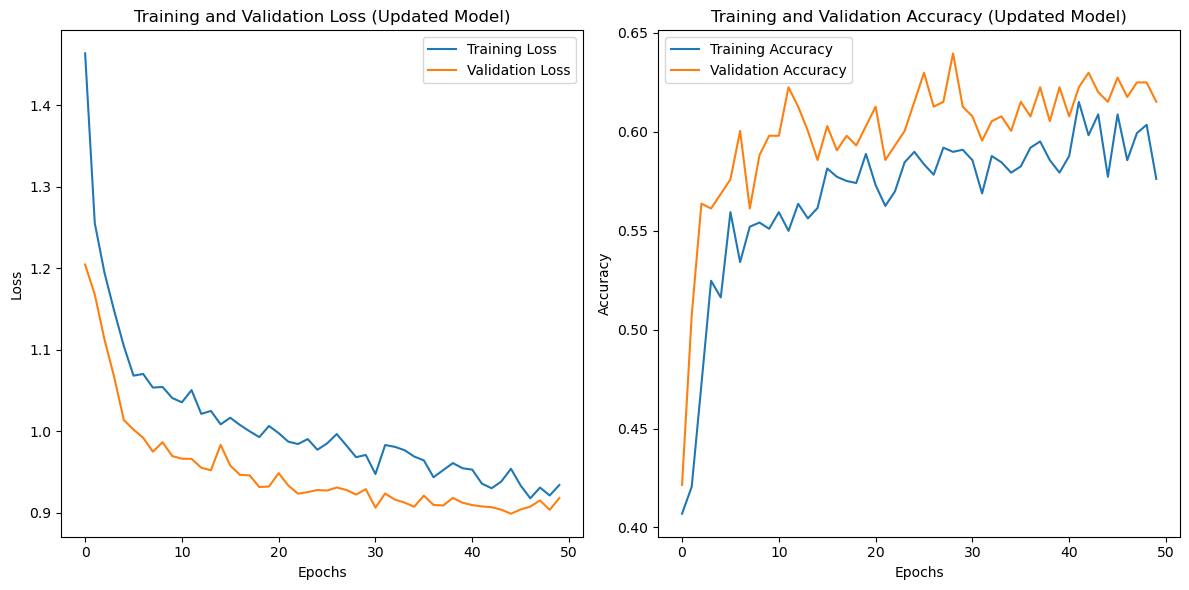

In [26]:
# Plot Training Loss and Validation Loss for updated model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(updated_history.history['loss'], label='Training Loss')
plt.plot(updated_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Updated Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy and Validation Accuracy for updated model
plt.subplot(1, 2, 2)
plt.plot(updated_history.history['accuracy'], label='Training Accuracy')
plt.plot(updated_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Updated Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### insights about difference observed in both the models

Initial Model Performance:
Test Loss: 0.9391
Test Accuracy: 0.6029

Updated Model Performance:
Test Loss: 0.9180
Test Accuracy: 0.6152

Analysis of Model Performance:

Test Loss:

The initial model had a test loss of 0.9391.
The updated model improved with a test loss of 0.9180.
Insight: A decrease in test loss indicates that the updated model is better at minimizing errors on the test data compared to the initial model. This suggests that the updated model has learned to generalize better on the unseen test data.

Test Accuracy:

The initial model had a test accuracy of 0.6029.
The updated model had a test accuracy of 0.6152.
Insight: An improvement in test accuracy from 60.29% to 61.52% signifies that the updated model correctly predicts the signal quality for a higher proportion of the test samples. Although the improvement is modest, it indicates that the adjustments made to the model architecture positively impacted its predictive performance.

#### Observations:

Improvement in Generalization: The updated model shows better generalization capabilities, as indicated by the lower test loss and higher test accuracy.

Modest Gain: The improvement in test accuracy, while positive, is relatively small. This suggests that while the updates to the model architecture were beneficial, there may be more potential improvements to be explored.


Model Complexity: The changes made in the updated model might have helped in capturing more complex patterns in the data, leading to a better fit on the test data.

#### For Further Improvement:

Additional Hyperparameter Tuning:
can Continue experimenting with different hyperparameters (e.g., learning rate, batch size, number of epochs) to further optimize the model performance.

Enhanced Regularization: Implement stronger regularization techniques (e.g., L2 regularization, dropout) to reduce overfitting and improve generalization.

Feature Engineering: Investigate and potentially add more relevant features or engineer new features from existing ones to provide the model with more informative data.

Cross-Validation: Use cross-validation to ensure that the model's performance is consistent across different subsets of the data and to avoid overfitting to a specific train-test split.